# Imports and settings

In [1]:
%matplotlib inline

### IMPORTS ###

import theano
import theano.tensor as T
import theano.tensor.nnet as nnet
import matplotlib.pyplot as plt
import numpy

rng = numpy.random # random number generator

N = 200
alpha = 0.1
nEpochs = 50

# Training samples

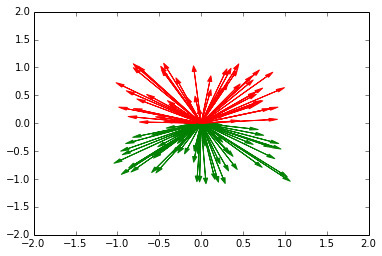

In [2]:
X = (2.0 * rng.sample((N,2)) - 1) # [-1,1]x[-1,2]
Y = [int(x[1] > 0) for x in X]    # 1/0 for up/down

# Plot training samples

plt.xlim([-2,2])
plt.ylim([-2,2])

for i in range(100):
    if Y[i]: c = 'r'
    else: c = 'g'
    plt.arrow(0, 0, X[i][0], X[i][1], head_width=0.05, head_length=0.1, fc=c, ec=c)

plt.show()

In [3]:
###### SYMBOLIC VARIABLES ###

x = T.vector('x') # input
y = T.scalar('y') # expected value

init = rng.rand(2, 2)

w1 = theano.shared(init, name = 'w1')
w2 = theano.shared(rng.rand(2), name = 'w2')

### EXPRESSION GRAPH ###

def layer (x, w):
    return nnet.sigmoid(T.dot(w.T, x))

hiddenLayer  = layer (x, w1)                 # hidden layer
outputLayer  = T.sum(layer(hiddenLayer, w2)) # output layer

cost = (outputLayer - y)**2                  # cost function

def gradient (c, w):                 # cost function, weights
    return w - alpha * T.grad (c, w) # update weights

### COMPILE ###

train = theano.function(inputs = [x,y],
                        outputs = cost,
                        updates = [(w1, gradient(cost, w1)),
                                   (w2, gradient(cost, w2))])

predict = theano.function(inputs=[x], outputs=outputLayer)

In [4]:
### TRAIN ###

neuron1 = []
neuron2 = []

for i in range (nEpochs):
    for j in range(N): c = train(X[j], Y[j])
    neuron1.append([w1.get_value()[0][0], w1.get_value()[1][0]])
    neuron2.append([w1.get_value()[0][1], w1.get_value()[1][1]])

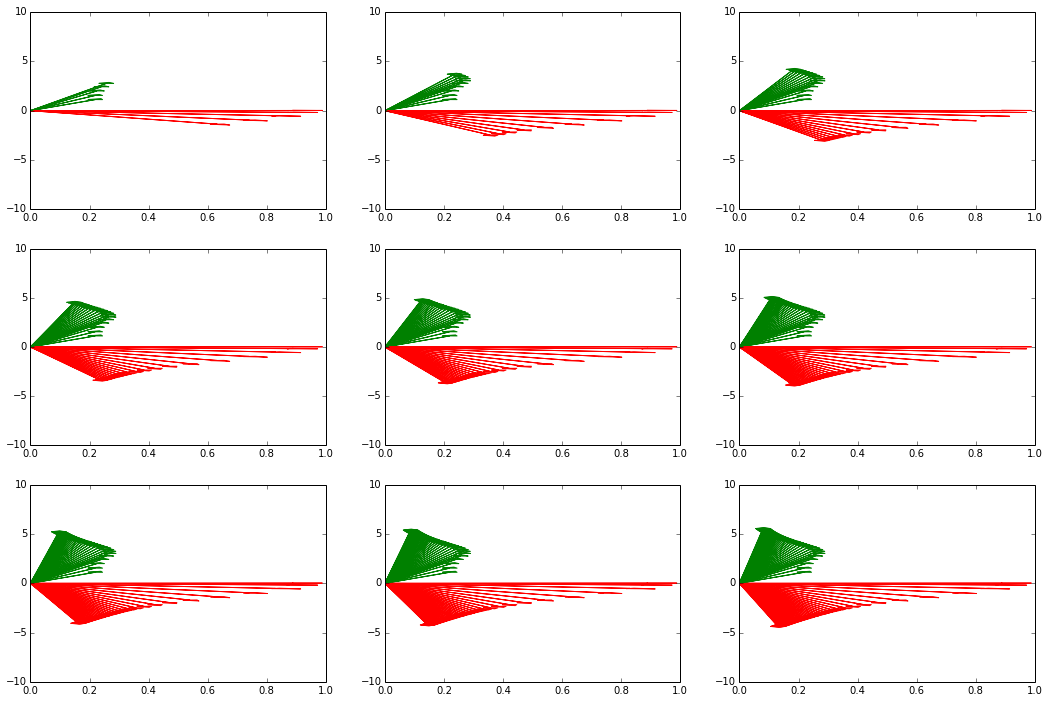

In [5]:
### PLOT WEIGHTS ###

fig, plots = plt.subplots(3,3) 
fig.set_size_inches((3, 3) * fig.get_size_inches())

step = nEpochs / 9

for i in range(3):
    for j in range(3):
        plots[i][j].set_ylim([-10,10])
        n = (i+1) + j* 3
        for e in range(n*step):
            plots[j][i].arrow(0, 0, neuron1[e][0], neuron1[e][1], head_width=0.05, head_length=0.1, fc='r', ec='r')
            plots[j][i].arrow(0, 0, neuron2[e][0], neuron2[e][1], head_width=0.05, head_length=0.1, fc='g', ec='g')
            
plt.show()